#### 1 WT4, DJF (Wet California)
 - 1.1) Find the top 25% of years that have the highest frequency of WT4 in DJF
 - 1.2) Calculate the seasonal mean Z500 for those top 25% of years.
 - 1.3) Calculate the seasonal mean/STD over all years. 
 - 1.4) Plot the anomaly of the top 25% of years (P75-climatoloty)/stddev(climatoloty) 
#### 2 WT9 JAS (Wet Monson) 
 - 2.1) Find the top 25% of years that have the highest frequency of WT9 in ASO
 - 2.2) Calculate the seasonal mean Z500 for those top 25% of years.
 - 2.3) Calculate the seasonal mean/STD over all years. 
 - 2.4) Plot the anomaly of the top 25% of years (P75-climatoloty)/stddev(climatoloty) 
#### 3 WT Seasonal climatology

In [1]:
# similar plot for  ERAI, SMYLE and ECMWF (SST and Z500)

In [2]:
import sys
import datetime
import calendar
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import xarray as xr
import cfgrib
import matplotlib.pyplot as plt
import glob 
import os.path
import cartopy 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# inorder to import my pathon module, add
# $PYTHONPATH for jupyter for module
sys.path.append("/glade/u/home/mingge/PYTHON")
import coexist_func 
from importlib import reload
reload(coexist_func)
from coexist_func import plot_single
from coexist_func import find_year_top25_wt_erai
from coexist_func import cal_seasonalmean_wt_erai
from coexist_func import ax_coastlines_country
from coexist_func import cal_season_std_erai
from coexist_func import cal_season_cli_erai
from coexist_func import cal_season_ano_erai
from coexist_func import plot_prec_12

casper_2020

#### setups

In [3]:
dir_erai = '/gpfs/fs1/collections/rda/data/ds627.0/ei.oper.an.pl/'
dir_o    = '/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/'
dir_wt   = dir_o + 'WT/'

season_dict = {
    'DJF': [12,1,2],
    'MAM': [3,4,5],
    'JJA': [6,7,8],
    'SON': [9,10,11],
    'JAS': [7,8,9]}

n_season = len(season_dict)

year_s = 1979
year_e = 2014
n_year = year_e - year_s + 1

n_wt = 12

lat_s = -20
lat_e = 80
lon_s = 0
lon_e = 360

### check on data
 - cfgrib support xr.open_dataset engine="cfgrib"
 - engine="cfgrib"
##### NOTE: 
 - to avoid idx error, use backend_kwargs={'indexpath' :''})
 - in backend_kwargs filter_by_keys set file name and level like:
      "filter_by_keys": {"shortName": "z", "typeOfLevel": "isobaricInhPa"}

In [5]:
flnm_test = dir_erai + '201402/ei.oper.an.pl.regn128sc.2014022812'
#z = xr.open_dataset(flnm_test, engine="cfgrib", backend_kwargs={'indexpath' :'', \
#                    "filter_by_keys": {"shortName": "z", "typeOfLevel": "isobaricInhPa"}})
ds = xr.open_dataset(flnm_test, engine="cfgrib", backend_kwargs={'indexpath' :'' })
print('original Z500 dataset', flnm_test)
#ds['z'].loc[500].plot()

#z500 = ds.z.sel(isobaricInhPa=850,latitude=slice(lat_e, lat_s)) 
#z500.plot()

#n_lat  = ds.dims['latitude']
#n_lon  = ds.dims['longitude']

latitude = ds['latitude'].sel(latitude=slice(lat_e, lat_s)) 
longitude = ds['longitude'] 
n_lat = len(latitude)
n_lon = len(longitude)

original Z500 dataset /gpfs/fs1/collections/rda/data/ds627.0/ei.oper.an.pl/201402/ei.oper.an.pl.regn128sc.2014022812


#### 1.1) Find the top 25% of years that have the highest frequency of  WT4 in DJF

In [6]:
# for winter DJF season_dict[1]
key = 'DJF'

# target WT 4
wt_t = 4

year_p75 = find_year_top25_wt_erai(year_s, year_e, season_dict, dir_erai, dir_wt, wt_t, key) 
 

      z500
2011   6.0
2002   6.0
2014   7.0
2006   7.0
1985   7.0
1990   7.0
2009   8.0
1982   9.0
1988   9.0
2007  11.0
2008  11.0
1986  11.0
1998  11.0
2003  12.0
1989  12.0
2010  13.0
2012  13.0
1979  13.0
1996  13.0
1984  13.0
2013  14.0
1997  14.0
1999  15.0
1983  16.0
2000  16.0
1980  17.0
2001  18.0
1981  18.0
2004  19.0
1994  21.0
1991  21.0
1992  22.0
1995  22.0
1993  24.0
2005  26.0
1987  28.0
top 25% years are Int64Index([1981, 2004, 1994, 1991, 1992, 1995, 1993, 2005, 1987], dtype='int64')


In [7]:
[1981, 2004, 1994, 1991, 1992, 1995, 1993, 2005, 1987] 

[1981, 2004, 1994, 1991, 1992, 1995, 1993, 2005, 1987]

 - 1.2) Calculate the seasonal mean Z500 for those top 25% of years.

In [8]:
flnm_o = dir_o + 'z500_p75_wt' + str(wt_t) + '_'+ key +'.nc'
z500_p75_2d_xr = cal_seasonalmean_wt_erai('z',dir_erai, season_dict, key, year_p75, latitude, longitude, lat_s, lat_e, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/z500_p75_wt4_DJF.nc exist
Frozen({'latitude': 143, 'longitude': 512})


- 1.3) read the seasonal mean and STD over all years

In [9]:
flnm_o = dir_o + 'z500_'+ key +'_MeanStd.nc'
var_cli_xr = cal_season_std_erai('z', dir_erai, season_dict, key, year_s, year_e, latitude, longitude, lat_s, lat_e, flnm_o)
var_xr = var_cli_xr[0]
var_std_xr= var_cli_xr[1]

/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/z500_DJF_MeanStd.nc exist
Frozen({'mean_std': 2, 'latitude': 143, 'longitude': 512})


 - 1.4) Plot the anomaly of the top 25% of years (P75-climatoloty)/stddev(climatoloty) 

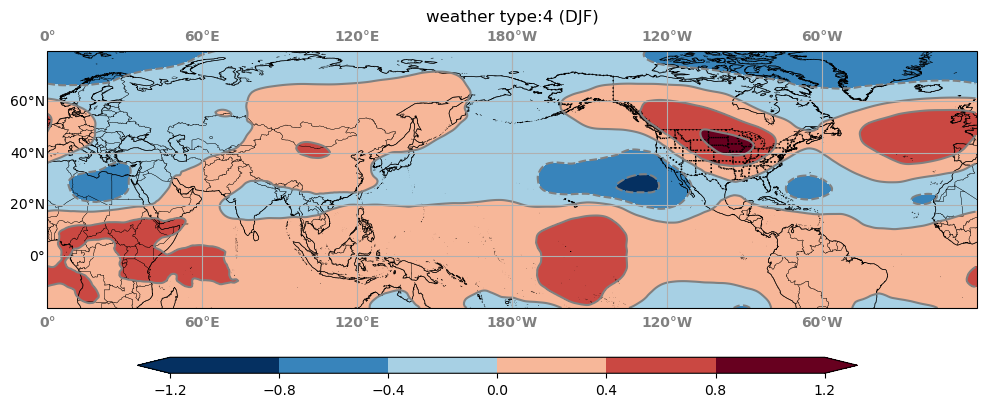

In [10]:
ano_2d = (z500_p75_2d_xr - var_xr)/var_std_xr
plot_single(ano_2d, wt_t, key)

#### 2) WT9 (wet monsoon) for JAS.
 - 2.1) Find the top 25% of years that have the highest frequency of WT9 in JAS

In [11]:
# for winter DJF season_dict[1]
key = 'JAS'

# target WT 9
wt_t = 9

year_p75 = find_year_top25_wt_erai(year_s, year_e, season_dict, dir_erai, dir_wt, wt_t, key) 

      z500
2010   7.0
2011  12.0
1993  15.0
1980  17.0
1987  19.0
1988  22.0
1999  25.0
1995  25.0
1986  27.0
1985  28.0
2007  28.0
1979  28.0
2012  29.0
2005  30.0
2001  31.0
2000  32.0
1998  32.0
1981  32.0
1983  32.0
1984  33.0
1992  33.0
2004  34.0
2008  34.0
1982  36.0
2003  36.0
2006  36.0
1989  37.0
1994  37.0
1991  37.0
2002  39.0
1997  43.0
1990  43.0
2013  44.0
1996  47.0
2009  47.0
2014  53.0
top 25% years are Int64Index([1994, 1991, 2002, 1997, 1990, 2013, 1996, 2009, 2014], dtype='int64')


 - 2.2) Calculate the seasonal mean Z50 for those top 25% of years.

In [12]:
flnm_o = dir_o + 'z500_p75_wt' + str(wt_t) + '_'+ key +'.nc'
z500_p75_2d_xr = cal_seasonalmean_wt_erai('z',dir_erai, season_dict, key, year_p75, latitude, longitude, lat_s, lat_e, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/z500_p75_wt9_JAS.nc exist
Frozen({'latitude': 143, 'longitude': 512})


 - 2.3)  read the seasonal mean and STD over all years

In [13]:
flnm_o = dir_o + 'z500_'+ key +'_MeanStd.nc'
var_cli_xr = cal_season_std_erai('z', dir_erai, season_dict, key, year_s, year_e, latitude, longitude, lat_s, lat_e ,flnm_o)
var_xr = var_cli_xr[0]
var_std_xr= var_cli_xr[1]

/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/z500_JAS_MeanStd.nc exist
Frozen({'mean_std': 2, 'latitude': 143, 'longitude': 512})


 - 2.4) Plot the anomaly of the top 25% of years (P75-climatoloty)/stddev(climatoloty)

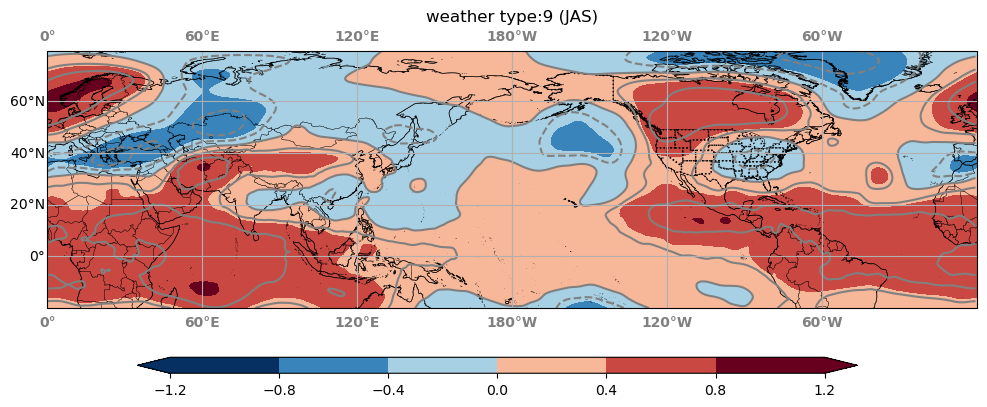

In [14]:
ano_2d = (z500_p75_2d_xr - var_xr)/var_std_xr
plot_single(ano_2d, wt_t, key)

#### 3 Seasonal limatology

In [15]:
flnm_o = dir_o + 'z500_seasonal_cli.nc'
z500_cli_xr = cal_season_cli_erai('z', dir_erai, season_dict, year_s, year_e, latitude, longitude, lat_s, lat_e, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/z500_seasonal_cli.nc exist
Frozen({'season': 4, 'latitude': 143, 'longitude': 512})


 - 3.2) seasonal anomaly

In [16]:
flnm_cli = dir_o + 'z500_seasonal_cli.nc'
flnm_o = dir_o + 'z500_seasonal_ano.nc'
cal_season_ano_erai('z', dir_erai, dir_wt, season_dict, year_s, year_e, latitude, longitude, lat_s, lat_e, flnm_cli, flnm_o)

/glade/campaign/mmm/c3we/mingge/COEXIST/ERAI/z500_seasonal_ano.nc exist


In [ ]:
with  xr.open_dataset(flnm_o) as ds:
        # proj = ccrs.PlateCarree(central_longitude=180)
        # longitude from [-180, 180] -> [0,360]
        #ds.coords['longitude'] = xr.where(ds['longitude'] < 0, ds['longitude'] + 360, ds['longitude'])
        #ds = ds.sortby(ds.longitude)
        z500_wt = ds.__xarray_dataarray_variable__
         
season_s = ['DJF','MAM','JJA','SON']            

# Because proj = ccrs.PlateCarree(central_longitude=180)
# I need to convert longitude from [-180, 180] -> [0,360]
z500_wt.coords['longitude'] = xr.where(z500_wt['longitude'] < 0, z500_wt['longitude'] + 360, z500_wt['longitude'])
z500_wt = z500_wt.sortby(z500_wt.longitude)

# plot 4 seasons
for ns in range(4):
    if ns == 2:
        plot_prec_12(z500_wt[:,ns]*100, -1, 1, 17, 'coolwarm', 'horizontal', season_s[ns]);
    else:
        plot_prec_12(z500_wt[:,ns]*100, -3, 3, 19, 'coolwarm', 'horizontal', season_s[ns]); 
       